# **Домашнее задание 7: Fraud Detection Competition**

Добро пожаловать на финальное домашнее задание курса! Домашнее задание направлено на систематизацию всех знаний, полученных в процессе учебы.

В нём Вы потренируетесь применять навыки построения пайплайнов машинного обучения, приобретенные в курсе от точки разведочного анализа данных до построения и валидации моделей машинного обучения.

## **Задача**
**Вы будете решать задачу определения фрода:**

https://www.kaggle.com/competitions/fraud-detection-24

**Вам нужно будет:**
- в jupyter notebook провести исследование данных;
- в нём же построить модели и оценить их качество;
- отправить посылку на Kaggle.

Более подробное описание шагов - в ноутбуке ниже.

## **Оценивание и баллы**
- В EDA и во всей работе будут оцениваться полнота и **выводы**;
- При обучении моделей старайтесь обоснованно подходить к их выбору, избегая простого перебора;

**Максимальный балл** - 10 (+ бонусы за Kaggle, см. ниже).


Мягкий дедлайн (окончание соревнования на Kaggle): **15 марта 23:59**


# **Базовое решение и пример формирования файла под submission**


In [1]:
# %%capture
# !pip install catboost -q

In [2]:
# from catboost import CatBoostClassifier
# import pandas as pd
# import os
# from tqdm import tqdm

# INPUT_DIR = './'

# train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
# train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
# test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
# test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))
# sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))

# df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')

# df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')

# df_train.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
# df_test.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
# df_train.shape, df_test.shape

# object_cols = []
# for idx, col in tqdm(enumerate(df_train.columns.drop('isFraud'))):
#     if df_train[col].dtype == 'O':
#       object_cols.append(idx)

# X_train = df_train.drop('isFraud', axis=1)
# X_train = X_train.fillna('')
# y_train = df_train['isFraud'].values

# cb = CatBoostClassifier(iterations=3)
# cb.fit(X_train, y_train, object_cols, )

# predictions = cb.predict_proba(df_test.fillna(''))

# sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 0]})
# sub.head()

# # Сохранение submission
# sub.to_csv('submission_baseline.csv', index=False)

### **Примечания:**

**1. Оценка качества и Submission File**
- Ответом является число от 0 до 1, метрикой качества - AUC-ROC.
- Структура Submission File:
 - для каждого значения *TransactionID* в тестовых данных вы должны предсказать **вероятность** для столбца *isFraud*.
 - в файле у вас должно быть две колонки: `TransactionID` и`isFraud`  **для каждой транзакции в датасете**.

**2. Объем данных**

Поскольку набор данных объемный, могут быть проблемы с переполнением памяти в Collab. Для решения проблемы можете использовать функцию из [этого ноутбука](https://colab.research.google.com/drive/18u75eyFGEoyeWJ_MbsLkcPa6gv2tNI8G#scrollTo=V2L1Nl5CTMMl), разобравшись, что она делает с данными.

# **Задание 1 (2 балла)**

Проведите EDA (разведочный анализ данных):
* проанализируйте признаки, их особенности и связь с целевой переменной
* проанализируйте целевую переменную
* оцените степень попарной взаимосвязи признаков, а также связи признаков и целевой переменной
* по результатам исследований сделайте необходимую обработку данных (удаление дублей, работа с пропусками, с категориальными столбцами (если они есть), работа с аномалиями, другие преобразования признаков)

Важно, что EDA всегда сопровождается выводами - не забудьте об этом.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import os
from datetime import datetime

In [5]:
INPUT_DIR = '/content/drive/MyDrive/AI/fraud-detection-24'

train_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'train_transaction.csv'))
train_identity = pd.read_csv(os.path.join(INPUT_DIR, 'train_identity.csv'))
test_transaction = pd.read_csv(os.path.join(INPUT_DIR, 'test_transaction.csv'))
test_identity = pd.read_csv(os.path.join(INPUT_DIR, 'test_identity.csv'))

df_train = train_transaction.merge(train_identity, how='left', on='TransactionID')
df_test = test_transaction.merge(test_identity, how='left', on='TransactionID')

df_train.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)
df_test.drop(['TransactionID', 'TransactionDT'], axis=1, inplace=True)

In [6]:
del train_transaction, train_identity, test_transaction, test_identity

In [7]:
datetime.fromordinal(86400)

datetime.datetime(237, 7, 22, 0, 0)

In [8]:
df_train.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,0,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [9]:
df_train.describe()

,isFraud,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,417559.000000,417559.000000,417559.000000,410996.000000,416738.000000,414578.000000,369586.000000,369586.000000,159468.000000,29286.000000,...,107259.000000,34269.000000,107226.000000,107209.000000,3950.000000,3954.000000,3624.000000,3930.000000,3948.000000,62116.000000
mean,0.035255,134.666566,9865.320371,363.474253,153.347864,199.687439,290.437990,86.762670,124.795796,239.833094,...,187.936416,14.172547,352.299619,400.498661,371.863038,15.991148,12.790563,328.534351,148.645643,26.635327
std,0.184424,238.166118,4900.674210,158.146603,11.566162,40.783018,101.852266,2.930881,381.805459,538.292779,...,30.118252,1.479054,140.265671,150.423924,200.186906,6.891239,2.189355,98.821070,32.355822,3.787343
min,0.000000,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,0.000000,42.950000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,3.000000,7.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,0.000000,68.950000,9633.000000,361.000000,150.000000,226.000000,299.000000,87.000000,9.000000,36.000000,...,166.000000,15.000000,341.000000,469.000000,252.000000,14.000000,11.000000,321.000000,147.000000,24.000000
75%,0.000000,125.000000,14128.000000,512.000000,150.000000,226.000000,330.000000,87.000000,25.000000,225.000000,...,225.000000,15.000000,427.000000,521.000000,500.000000,14.000000,15.000000,371.000000,169.000000,32.000000
max,1.000000,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,10286.000000,11623.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [10]:
df_train.describe(include='O')

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,417559,416730,416733,352649,103820,194116,194116,194116,215646,165564,...,62096,107961,57819,62168,108273,108273,108273,108273,108124,91959
unique,5,4,4,59,60,2,2,2,3,2,...,71,110,183,4,2,2,2,2,2,1551
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
freq,301297,272753,306554,160974,43010,194098,173868,152682,136257,91343,...,16078,21821,13466,46931,62152,102536,84398,57779,66324,36841


Очень много переменных, невозможно проанализировать все по отдельности. При этом заметно, что встречается много пропусков, посмотрю распределение признаков по доле пропусков:

<Axes: >

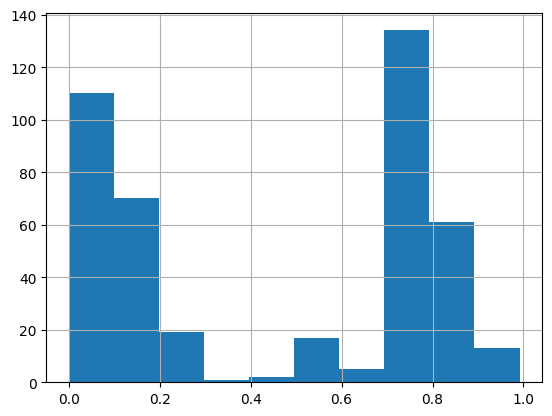

In [11]:
(df_train.isna().sum(axis=0) / len(df_train)).hist()

Видно, что больше половины признаков по большей части состоят из пропусков. На мой взгляд, есть смысл рассматривать те признаки, в которых не более 30% пропусков, оставлю лишь их

In [12]:
cols_to_drop = df_train.columns[df_train.isna().sum(axis=0) / len(df_train) > 0.3]
df_train.drop(columns=cols_to_drop, inplace=True)
df_test.drop(columns=cols_to_drop, inplace=True)

Проверю наличие дубликатов

In [13]:
df_train.duplicated().any()

True

In [14]:
df_train.drop_duplicates(inplace=True)

In [15]:
len(df_train)

409575

Построю тепловую карту коррелияции признаков:

<Axes: >

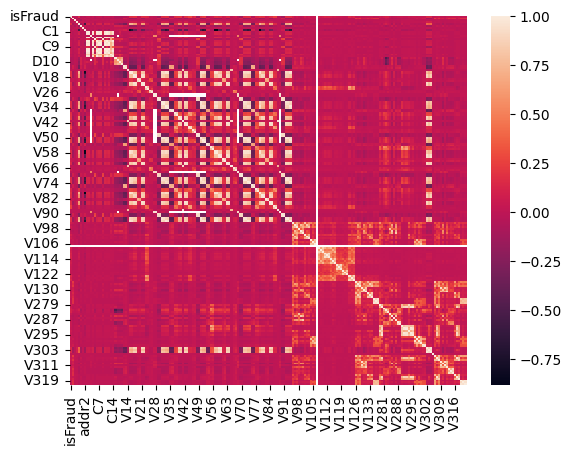

In [16]:
corr_matrix = df_train.corr(numeric_only=True)
sns.heatmap(corr_matrix)

Построю распределение попарных корреляций признаков:

In [17]:
corr_df = (
    corr_matrix - np.diag(np.ones(len(corr_matrix)))
).abs().melt(ignore_index=False).reset_index()

array([[<Axes: title={'center': 'value'}>]], dtype=object)

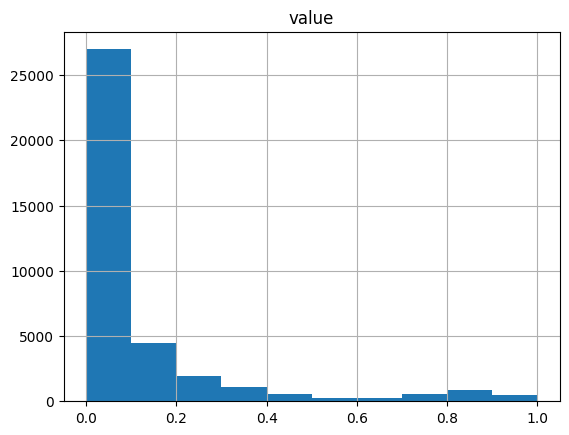

In [18]:
corr_df.hist('value')

Главным образом значения скоррелированы слабо, но есть часть линейно зависимых значений. При обучении они не будут давать новой информации, но при этом будут усложняться вычисления. Избавлюсь от значений, корреляция между которыми выше 0.7

In [19]:
cols_to_delete = []
for _, row in corr_df[corr_df.value > 0.7].iterrows():
    if row['index'] not in cols_to_delete and row['variable'] not in cols_to_delete:
        cols_to_delete.append(
            row['index'] if df_train[row['index']].isna().sum() > df_train[row['variable']].isna().sum() \
              else row['variable']
        )

In [20]:
df_train.drop(columns=cols_to_delete, inplace=True)
df_test.drop(columns=cols_to_delete, inplace=True)

<Axes: >

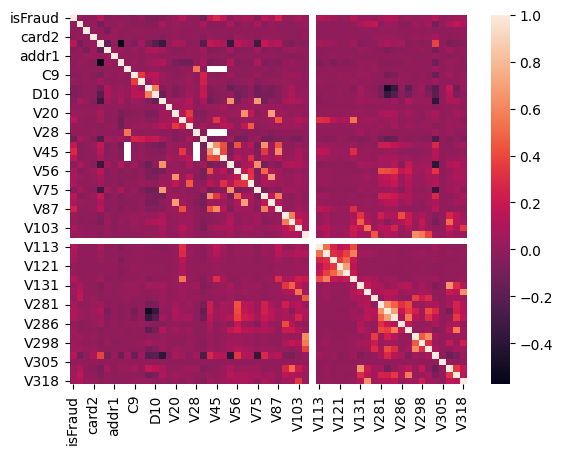

In [21]:
sns.heatmap(df_train.corr(numeric_only=True))

На этой тепловой карте уже лучше видно, что значимой корреляции с целевой переменной нет, проверяю:

In [22]:
corr_w_target = df_train.corrwith(df_train.isFraud, numeric_only=True)
sorted = np.argsort(np.abs(corr_w_target.values))[::-1]
corr_w_target.iloc[sorted[:10]]

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
V107,NaN
isFraud,1.000000
V45,0.279931
V87,0.248532
V38,0.189146
V47,0.168855
V78,0.153476
card3,0.149539
V304,0.137638
V24,0.134124


Есть признаки, которые показывают связь с целевой переменной. Посмотрим на аномалии

In [23]:
q1 = df_train.select_dtypes(include='number').quantile(q=0.25, axis=0)
q3 = df_train.select_dtypes(include='number').quantile(q=0.75, axis=0)
iqr = q3 - q1
lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)

In [24]:
anomalies_ratio = (
    (df_train.select_dtypes(include='number') > upper) + \
     (df_train.select_dtypes(include='number') < lower)
).sum(axis=0) / len(df_train)

In [25]:
anomalies_ratio.sort_values(ascending=False).head(10)

,0
V62,0.187575
V20,0.186872
V83,0.176466
V315,0.171246
V289,0.171246
C14,0.159600
V131,0.152202
V100,0.152202
D1,0.129546
card3,0.119485


Довольно много аномалий, причем именно в тех признаках, что сильнее всего связаны с целевой переменной. Есть гипотеза, что количество аномалий будет коррелировать с процентом фрода:

In [26]:
out = {}
for col in df_train.select_dtypes(include='number').columns:
    out[col] = df_train[(df_train[col] > upper[col]) | (df_train[col] < lower[col])].isFraud.mean()

In [27]:
anomalies_fraud_val = pd.DataFrame({'val': out})

In [28]:
pd.concat(
    (
        anomalies_fraud_val,
        anomalies_ratio
    ),
    axis=1
).corr('spearman')

,val,0
val,1.000000,-0.281161
0,-0.281161,1.000000


Связь действительно прослеживается. Следовательно, не стоит удалять аномалии

Теперь посмотрю на категориальные признаки:

In [29]:
df_train.describe(include='O')

,ProductCD,card4,card6,P_emaildomain
count,409575,408746,408749,345212
unique,5,4,4,59
top,W,visa,debit,gmail.com
freq,298172,266351,300890,156054


In [30]:
df_train.ProductCD.value_counts() / len(df_train)

,count
ProductCD,
W,0.728003
C,0.120776
R,0.069335
H,0.064474
S,0.017411


In [31]:
df_train.card4.value_counts() / len(df_train)

,count
card4,
visa,0.650311
mastercard,0.319656
american express,0.016493
discover,0.011517


In [32]:
df_train.card6.value_counts()  / len(df_train)

,count
card6,
debit,0.734640
credit,0.263234
debit or credit,0.000073
charge card,0.000037


Есть очень редкие значения. Можно свести переменную к бинарному признаку (пропуски сразу заполняю самым популярным значением):

In [33]:
df_train.card6 = df_train.card6.apply(lambda x: 1 if x=='credit' else 0)
df_test.card6 = df_test.card6.apply(lambda x: 1 if x=='credit' else 0)

Теперь самый разнообразный признак

In [34]:
(df_train.P_emaildomain.value_counts()  / len(df_train)).head(20)

,count
P_emaildomain,
gmail.com,0.381014
yahoo.com,0.170811
hotmail.com,0.079563
anonymous.com,0.064689
aol.com,0.048360
comcast.net,0.014017
icloud.com,0.010643
outlook.com,0.008753
msn.com,0.007278


На мой взгляд, можно оставить те значения, которые встречаются чаще 1%, остальные выделить в "other":

In [35]:
P_emaildomain_vals = df_train.P_emaildomain.value_counts()
main_values = P_emaildomain_vals[P_emaildomain_vals / len(df_train) > 0.01].index

df_train.P_emaildomain = df_train.P_emaildomain.apply(
    lambda x: x if x in main_values or pd.isna(x) else 'other'
)
df_test.P_emaildomain = df_test.P_emaildomain.apply(
    lambda x: x if x in main_values or pd.isna(x) else 'other'
)

Перед тем, как закодировать категориальные переменные, заполню пропуски в данных. Для числовых столбцов средним, для категориальных самым популярным классом

In [36]:
fill_values = pd.concat(
    (
        df_train.select_dtypes(include='number').mean(axis=0),
        df_train.select_dtypes(include='O').mode(axis=0).T
    ),
    axis=0
)

In [37]:
df_train.select_dtypes(include='O').mode(axis=0).T

,0
ProductCD,W
card4,visa
P_emaildomain,gmail.com


In [38]:
df_train.fillna(fill_values.to_dict()[0], inplace=True)
df_test.fillna(fill_values.to_dict()[0], inplace=True)

Кодируем оставшиеся переменные и масштабируем данные

In [39]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [40]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [41]:
ohe = OneHotEncoder(sparse_output=False)
train_ohe = ohe.fit_transform(df_train.select_dtypes(include='O'))
test_ohe = ohe.transform(df_test.select_dtypes(include='O'))

In [42]:
df_train = pd.concat(
  (
      df_train,
      pd.DataFrame(train_ohe, columns=ohe.get_feature_names_out())
  ),
  axis=1
)

In [43]:
df_test = pd.concat(
  (
      df_test,
      pd.DataFrame(test_ohe, columns=ohe.get_feature_names_out())
  ),
  axis=1
)

In [44]:
scaler = StandardScaler()

y_train, df_train = df_train.isFraud.values, df_train.drop(columns=['isFraud'])
df_train_scaled = scaler.fit_transform(df_train.select_dtypes(include='number'))
df_test_scaled = scaler.transform(df_test.select_dtypes(include='number'))

Теперь посмотрим на целевую переменную:

(array([394933.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  14642.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

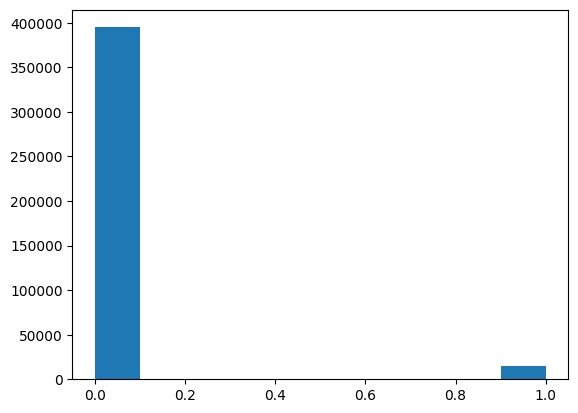

In [45]:
plt.hist(y_train)

Заметный дисбаланс классов. Это ограничивает нас в выборе моделей, так как без дополнительных решений мы не сможем испльзовать логистическую регрессию, так как она будет приближаться к константной модели.

# **Задание 2 (3 балла)**

Обучите несколько ML-моделей для решения поставленной задачи.
Оцените их качество двумя способами:

1) на кросс-валидации

2) на лидерборде

Подберите число фолдов на кросс-валидации так, чтобы метрики, которые вы видите, были максимально близки на кросс-валидации и на лидерборде.

По результатам экспериментов постройте таблицу:
* в каждой строке таблицы - результаты одной модели
* по столбцам: качество на кросс-валидации, качество на лидерборде, модель с гиперпараметрами
Полученную таблицу вставьте картинкой прямо в ноутбук после ячеек с кодом. Сделайте текстовые выводы.

## Подбор фолдов

In [46]:
%%capture
!pip install catboost -q

In [47]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
cb = CatBoostClassifier(iterations=50, depth=6, verbose=False)
cb.fit(df_train, y_train, cat_features=df_train.select_dtypes(include='O').columns.tolist())
predictions = cb.predict_proba(df_test)

In [ ]:
sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 1]})
sub.to_csv('submission_baseline_2.csv', index=False)

Метрика на лидерборде 0.86220

In [ ]:
cross_val_score(
    CatBoostClassifier(iterations=50, depth=6, verbose=False),
    cv=3,
    X=df_train,
    y=y_train,
    params=dict(cat_features=df_train.select_dtypes(include='O').columns.tolist()),
    scoring='roc_auc'
).mean()

0.8458201391577433

In [ ]:
cross_val_score(
    CatBoostClassifier(iterations=50, depth=6, verbose=False),
    cv=5,
    X=df_train,
    y=y_train,
    params=dict(cat_features=df_train.select_dtypes(include='O').columns.tolist()),
    scoring='roc_auc'
).mean()

0.8594681469801924

In [ ]:
cross_val_score(
    CatBoostClassifier(iterations=50, depth=6, verbose=False),
    cv=7,
    X=df_train,
    y=y_train,
    params=dict(cat_features=df_train.select_dtypes(include='O').columns.tolist()),
    scoring='roc_auc'
).mean()

0.8658031244321815

In [ ]:
cross_val_score(
    CatBoostClassifier(iterations=50, depth=10, verbose=False),
    cv=9,
    X=df_train,
    y=y_train,
    params=dict(cat_features=df_train.select_dtypes(include='O').columns.tolist()),
    scoring='roc_auc'
).mean()

0.8761994932423501

Оптимальное число фолдов — 5

| Номер | Модель | Гиперпараметры | CV score | True score |
| ---------- | -------- | ---------- | ----- | ----- |
| 0 | CatBoost | 10dp 50it | 0.8594 | 0.8622

## Оценка моделей

### CatBoost

In [ ]:
gs = GridSearchCV(
    CatBoostClassifier(verbose=False),
    param_grid={
        'iterations': [10, 25, 40, 55],
        'depth': [3, 6, 9, 12]
    },
    scoring='roc_auc',
    cv=5,
    verbose=2
)

gs.fit(
    df_train,
    y_train,
    cat_features=df_train.select_dtypes(include='O').columns.tolist()
)

In [ ]:
gs.best_params_, gs.best_score_

({'depth': 9, 'iterations': 55}, 0.8698826727935425)

In [ ]:
predictions = gs.best_estimator_.predict_proba(df_test)
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 1]})
sub.to_csv('submission_baseline_cb.csv', index=False)

| Номер | Модель | Гиперпараметры | CV score | True score |
| ---------- | -------- | ---------- | ----- | ----- |
| 1 | CatBoost | 9dp 55it | 0.8699 | 0.8599 |

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
gs = GridSearchCV(
    RandomForestClassifier(),
    param_grid={
        'n_estimators': [10, 25, 40, 55],
        'max_depth': [3, 6, 9, 12]
    },
    scoring='roc_auc',
    cv=5,
    verbose=2
)

gs.fit(
    df_train.select_dtypes(include='number'),
    y_train,
)

In [ ]:
gs.best_params_, gs.best_score_

({'max_depth': 12, 'n_estimators': 40}, 0.8618439878405141)

In [ ]:
predictions = gs.best_estimator_.predict_proba(df_test.select_dtypes(include='number'))
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 1]})
sub.to_csv('submission_baseline_rf.csv', index=False)

| Номер | Модель | Гиперпараметры | CV score | True score |
| ---------- | -------- | ---------- | ----- | ----- |
| 2 | RandomForest | 12dp 40it | 0.8618 | 0.8612 |

### LightGBM

In [ ]:
%%capture
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
gs = GridSearchCV(
    LGBMClassifier(verbosity=-1),
    param_grid={
        'n_estimators': [10, 25, 40, 55],
        'max_depth': [3, 6, 9, 12]
    },
    scoring='roc_auc',
    cv=5,
    verbose=2
)

gs.fit(
    df_train.select_dtypes(include='number'),
    y_train,
)

In [ ]:
gs.best_params_, gs.best_score_

({'max_depth': 12, 'n_estimators': 55}, 0.8817288032592131)

In [ ]:
predictions = gs.best_estimator_.predict_proba(df_test.select_dtypes(include='number'))
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 1]})
sub.to_csv('submission_baseline_lgbm.csv', index=False)

| Номер | Модель | Гиперпараметры | CV score | True score |
| ---------- | -------- | ---------- | ----- | ----- |
| 3 | LightGBM | 12dp 55it | 0.8817 | 0.8782 |

### XGBoost

In [59]:
from xgboost import XGBClassifier

In [ ]:
gs = GridSearchCV(
    XGBClassifier(),
    param_grid={
        'n_estimators': [10, 25, 40, 55],
        'max_depth': [3, 6, 9, 12]
    },
    scoring='roc_auc',
    cv=5,
    verbose=2
)

gs.fit(
    df_train.select_dtypes(include='number'),
    y_train,
)

In [ ]:
gs.best_params_, gs.best_score_

({'max_depth': 12, 'n_estimators': 25}, 0.8974871330732537)

In [ ]:
predictions = gs.best_estimator_.predict_proba(df_test.select_dtypes(include='number'))
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 1]})
sub.to_csv('submission_baseline_xgb.csv', index=False)

| Номер | Модель | Гиперпараметры | CV score | True score |
| ---------- | -------- | ---------- | ----- | ----- |
| 4 | XGBoost | 12dp 25it | 0.8975 | 0.8879 |

### Результаты:

| Номер | Модель | Гиперпараметры | CV score | True score |
| ---------- | -------- | ---------- | ----- | ----- |
| 0 | CatBoost | 10dp 50it | 0.8594 | 0.8622 |
| 1 | CatBoost | 9dp 55it | 0.8699 | 0.8599 |
| 2 | RandomForest | 12dp 40it | 0.8618 | 0.8612 |
| 3 | LightGBM | 12dp 55it | 0.8817 | 0.8782 |
| 4 | XGBoost | 12dp 25it | 0.8975 | 0.8879 |

# **Задание 3 (2 балла)**

Попробуйте подойти к задаче как к поиску аномалий.

1) Поищите аномалии (фрод) различными рассмотренными в курсе методами и сделайте прогноз на тестовых данных.

Результатом также будет таблица:
* по строкам - методы поиска аномалий
* по столбцам - качество вашего решения на leaderboard

2) Попробуйте встроить поиск аномалий и их удаление в ML-пайплайн: найдите аномалии и что-нибудь с ними сделайте до обучения моделей (можно удалить их, а можно использовать в качестве дополнительных признаков - попробуйте разные стратегии). Результат проверьте на кросс-валидации и на лидерборде, сделайте выводы.

## Поиск аномалий

In [48]:
%%capture
!pip install pyod

In [50]:
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.cblof import CBLOF

In [52]:
contamination = y_train.mean()

### HBOS

In [58]:
hbos = HBOS(contamination=contamination)
hbos.fit(df_train_scaled)
predictions = hbos.decision_function(df_test_scaled) / 100

sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions})
sub.to_csv('submission_baseline_hbos.csv', index=False)

| Номер | Модель | True score |
| ----- | -------- | ----- |
| 1 | HBOS | 0.6377 |

### IForest

In [54]:
iforest = IForest(contamination=contamination)
iforest.fit(df_train_scaled)
predictions = iforest.decision_function(df_test_scaled) / 100

sample_submission = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions})
sub.to_csv('submission_baseline_iforest.csv', index=False)

| Номер | Модель | True score |
| ----- | -------- | ----- |
| 2 | IForest | 0.7277 |

### CBLOF

In [55]:
cblof = CBLOF(contamination=contamination)
cblof.fit(df_train_scaled)
predictions = cblof.decision_function(df_test_scaled) / 100

sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions})
sub.to_csv('submission_baseline_cblof.csv', index=False)

| Номер | Модель | True score |
| ----- | -------- | ----- |
| 3 | CBLOF | 0.6674 |

### Результаты:
| Номер | Модель | True score |
| ----- | -------- | ----- |
| 1 | HBOS | 0.6377 |
| 2 | IForest | 0.7277 |
| 3 | CBLOF | 0.6674 |

## Учет аномалий в пайплайне

Возьму самый удачный алгоритм определения аномалий из рассмотренных — IForest и лучшую из рассмотренных моделей — 	XGBoost (12 max_depth, 25 n_estimators)

In [ ]:
iforest = IForest(contamination=contamination)
iforest.fit(df_train_scaled)

### Добавление информации

Так как информация об аномалиях полезна для задачи антифрода, попробую добавить ее в данные

In [58]:
df_train_w_anomalies = df_train.select_dtypes(include='number')
df_train_w_anomalies['anomaly_score'] = iforest.decision_function(df_train_scaled)

df_test_w_anomalies = df_test.select_dtypes(include='number')
df_test_w_anomalies['anomaly_score'] = iforest.decision_function(df_test_scaled)

In [60]:
cross_val_score(
    XGBClassifier(n_estimators=25, max_depth=12),
    cv=5,
    X=df_train_w_anomalies,
    y=y_train,
    scoring='roc_auc'
).mean()

0.8948651427681028

In [61]:
xgboost = XGBClassifier(n_estimators=25, max_depth=12)
xgboost.fit(df_train_w_anomalies, y_train)
predictions = xgboost.predict_proba(df_test_w_anomalies)

In [64]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 1]})
sub.to_csv('submission_baseline_xgb_anomalies.csv', index=False)

| Номер | Метод | CV score | True score |
| ---------- | -------- | ----- | ----- |
| 1 | Добавление инф-ы | 0.8949 | 0.8900 |

### Удаление аномалий

(array([1.62603e+05, 1.26944e+05, 7.26230e+04, 3.04950e+04, 1.10320e+04,
        4.10700e+03, 1.18200e+03, 4.25000e+02, 1.25000e+02, 3.90000e+01]),
 array([-0.15515128, -0.11772372, -0.08029615, -0.04286859, -0.00544102,
         0.03198654,  0.06941411,  0.10684167,  0.14426923,  0.1816968 ,
         0.21912436]),
 <BarContainer object of 10 artists>)

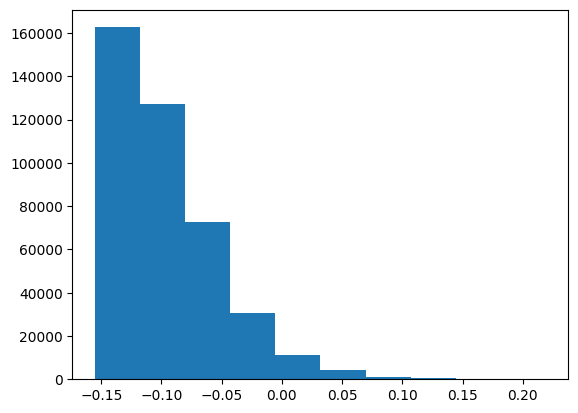

In [67]:
scores = iforest.decision_function(df_train_scaled)
plt.hist(scores)

In [70]:
df_train_wo_anomalies = df_train.select_dtypes(include='number').iloc[scores < 0]
y_train_wo_anomalies = y_train[scores < 0]

In [71]:
cross_val_score(
    XGBClassifier(n_estimators=25, max_depth=12),
    cv=5,
    X=df_train_wo_anomalies,
    y=y_train_wo_anomalies,
    scoring='roc_auc'
).mean()

0.8910669818077949

In [73]:
xgboost = XGBClassifier(n_estimators=25, max_depth=12)
xgboost.fit(df_train_wo_anomalies, y_train_wo_anomalies)
predictions = xgboost.predict_proba(df_test.select_dtypes(include='number'))

In [74]:
sub = pd.DataFrame({'TransactionID': sample_submission['TransactionID'], 'isFraud': predictions[:, 1]})
sub.to_csv('submission_baseline_xgb_wo_anomalies.csv', index=False)

| Номер | Метод | CV score | True score |
| ---------- | -------- | ----- | ----- |
| 2 | Удаление аномалий | 0.8910 | 0.8861 |

### Результаты:
| Номер | Метод | CV score | True score |
| ---------- | -------- | ----- | ----- |
| 0 | Бейзлайн | 0.8975 | 0.8879 |
| 1 | Добавление инф-ы | 0.8949 | 0.8900 |
| 2 | Удаление аномалий | 0.8910 | 0.8861 |

Лучше всего себя показал вариант с добавлением информации об аномалиях

# **Задание 4 (1 балл)**

Сделайте кластеризацию различными способами. Результаты кластеризации используйте для улучшения ML-решений:

1) Номера кластеров закодируйте (OHE или target-encoding) и добавьте как новые признаки

2) При использовании DBSCAN / HDBSCAN предсказанный шум можно трактовать как найденную аномалию и также добавить ее как новый признак

Проведите различные эксперименты. Проверьте как эти подходы влияют на качество прогнозов по кросс-валидации и на лидерборде, сделайте выводы.

In [ ]:
# ваши эксперименты с кластеризацией здесь

## **Задание 5 (1 балл)**

Примените какой-нибудь (один любой) AutoML фреймворк для решения поставленной задачи.

Отправьте AutoML-прогноз на kaggle и посмотрите на качество модели. Сделайте текстовые выводы.

In [ ]:
# ваш AutoML здесь

# **Задание 6 (1 балл)**

Весь курс мы работали в Google Colab. Но всегда должны быть запасные варианты, где Вы будете обучать модели.

Среди вариантов есть:
* ваша локальная машина
* kaggle notebooks
* yandex cloud
и другие.

Кроме привычного Google Colab выберите из списка выше один любой альтернативный вариант и проведите эксперимент:

* Прогоните ваш лучший по качеству по результатам заданий 2-4 ML-пайплайн заново в Google Colab и с помощью библиотек (например, при помощи библиотеки time) замерьте время обучения и отдельно время инференса на тестовых данных

* Прогоните этот пайплайн на выбранном альтернативном сервисе/локальной машине и также замерьте время обучения и инференса.

Текстом напишите выводы: опишите, какое альтернативное место для обучения моделей Вы использовали? Прикрепите прямо в ноутбук скриншот с экраном кода в альтернативном сервисе/на локальной машине. Также в виде таблицы приведите сравнение времени обучения и инференса в колабе и в альтернативном месте. Сделайте выводы.

In [ ]:
# ваши эксперименты здесь

# **Бонус: за Kaggle и стремление к хорошим скорам (2 балла)**

В этом домашнем задании Ваша цель - не просто выполнить шаги выше, но и построить максимально хорошую по качеству модель.

**К 10 вы можете получить до двух дополнительных баллов:**

* За попадание в топ-20% на private leaderboard — +1 дополнительный балл к оценке
* За попадание в топ-5 мест на private leaderboard — + еще один дополнительный балл к оценке (то есть суммарно 2 дополнительных балла)

**ВАЖНО!!!**

Эти баллы ставятся до мягкого дедлайна по соревнованию. После мягкого дедлайна лидерборд не обновляется, и дополнительные баллы не ставятся.

Успехов!

In [ ]:
# не забудьте прикрепить скриншоты лидерборда, пожалуйста